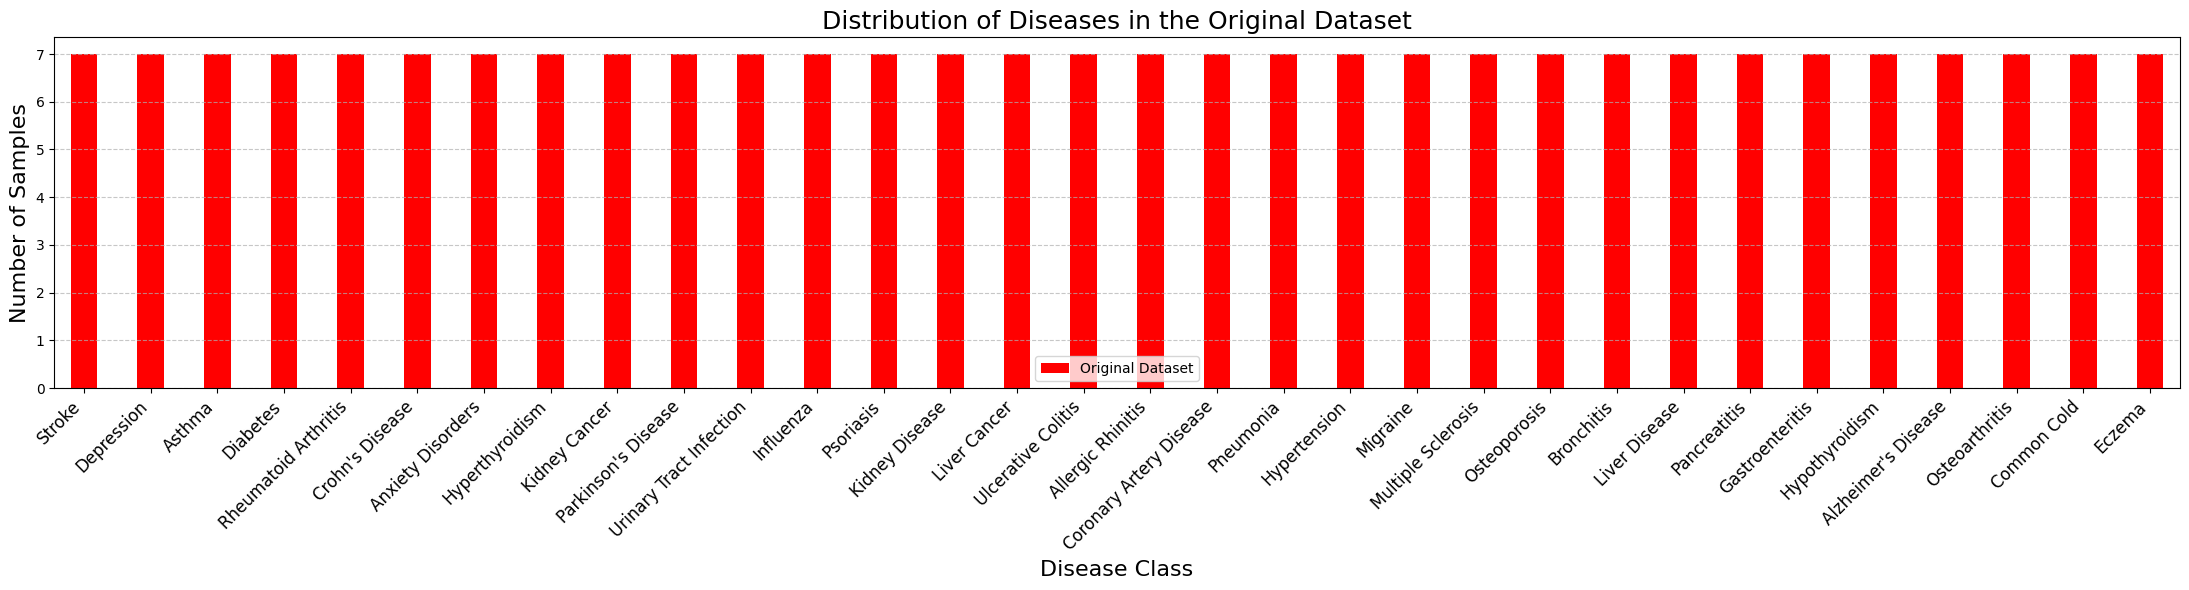

Percentage of classes with less than 2 samples in the original dataset: 0.0


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

"""
@Author:
    Patrik Holler
Show distribution of diseases in the dataset.
"""


# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Open locally stored datasets
df = pd.read_csv('kaggle/Disease Symptoms and Patient Profile Dataset_balanced.csv')

# Display statistics of number of classes and number of samples for each class in graph
disease_occurrence_count = df['Disease'].value_counts()

# Plot the distribution of diseases
plt.figure(figsize=(22, 6))

# Plot dataset 1 (original dataset)
disease_occurrence_count.plot(kind='bar', color='red', width=0.4, label='Original Dataset')

# Add labels and title with adjusted font sizes
plt.title('Distribution of Diseases in the Original Dataset', fontsize=18)
plt.xlabel('Disease Class', fontsize=16)
plt.ylabel('Number of Samples', fontsize=16)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Adjust layout to make sure everything fits (important for long labels)
plt.tight_layout()

# Display the plot
plt.show()

# Show how many classes have number of smaples below 2 (in percentage)
print("Percentage of classes with less than 2 samples in the original dataset:", (disease_occurrence_count < 2).mean())

In [19]:
"""
@author: 
    Patrik Holler
Data Cleaning:
- Filter the dataset to only include the first n diseases
- Add new Features and to the dataset with basic rules to set their values

"""

# Open locally stored dataset
df = pd.read_csv('kaggle/Disease Symptoms and Patient Profile Dataset_exported.csv')

# Display statistics of number of classes and number of samples for each class
disease_counts = df['Disease'].value_counts()
print("Dataset contains", len(df), "samples with", len(disease_counts), "unique classes and number of features, ", len(df.columns))

# Average number of samples per class
average_samples = disease_counts.mean()
print("Average number of samples per class:", average_samples)

# Filter the dataset to only include diseases with at least 5 instances
min_instances = 5   # Was set to be 5 by author
frequent_diseases = disease_counts[disease_counts >= min_instances].index
df_filtered = df[df['Disease'].isin(frequent_diseases)].copy() # Store copy of the base dataset

# New symptoms
new_symptoms = ['Headache', 'Sore Throat','Runny Nose']
new_vital_signs = ['Temperature', 'bmi'] 

# Add new symptoms to the dataset using .loc
for symptom in new_symptoms:
    df_filtered.loc[:, symptom] = 'No'

# Add new vital signs with default values
df_filtered.loc[:, 'Temperature'] = 36.5  # Normal temperature
df_filtered.loc[:, 'bmi'] = 22.5  # Normal bmi

# Update existing records with 'Yes' where applicable for positive cases
# Influenza
df_filtered.loc[
    (df_filtered['Disease'] == 'Influenza') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    ['Headache', 'Sore Throat', 'Runny Nose', 'Temperature']
] = ['Yes', 'Yes', 'Yes', 38.0]  # Higher temperature for fever

# Migraine
df_filtered.loc[
    (df_filtered['Disease'] == 'Migraine') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    'Headache'
] = 'Yes'

# Stroke
df_filtered.loc[
    (df_filtered['Disease'] == 'Stroke') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    'Headache'
] = 'Yes'

# Hypertension
df_filtered.loc[
    (df_filtered['Disease'] == 'Hypertension') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    'Headache'
] = 'Yes'

# Pneumonia
df_filtered.loc[
    (df_filtered['Disease'] == 'Pneumonia') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    ['Sore Throat', 'Temperature']
] = ['Yes', 39.0]  # Fever for Pneumonia

# Bronchitis
df_filtered.loc[
    (df_filtered['Disease'] == 'Bronchitis') & 
    (df_filtered['Outcome Variable'] == 'Positive'),
    ['Sore Throat', 'Runny Nose', 'Temperature']
] = ['Yes', 'Yes', 37.8]  # Elevated temperature

# Add new records (example)
# new_records = pd.DataFrame([
#     {'Disease': 'Asthma', 'Outcome Variable': 'Positive', 'Headache': 'No', 'Sore Throat': 'No', 'Runny Nose': 'No', 'Temperature': 36.5, 'bmi': 24.0},
#     {'Disease': 'Diabetes', 'Outcome Variable': 'Positive', 'Headache': 'No', 'Sore Throat': 'No', 'Runny Nose': 'No', 'Temperature': 36.5, 'bmi': 28.0},
#     {'Disease': 'Hypertension', 'Outcome Variable': 'Positive', 'Headache': 'Yes', 'Sore Throat': 'No', 'Runny Nose': 'No', 'Temperature': 36.5, 'bmi': 30.0},
#     {'Disease': 'Pneumonia', 'Outcome Variable': 'Positive', 'Headache': 'No', 'Sore Throat': 'Yes', 'Runny Nose': 'No', 'Temperature': 39.0, 'bmi': 25.0},
#     {'Disease': 'Bronchitis', 'Outcome Variable': 'Positive', 'Headache': 'No', 'Sore Throat': 'Yes', 'Runny Nose': 'Yes', 'Temperature': 37.8, 'bmi': 26.0},
#     {'Disease': 'Influenza', 'Outcome Variable': 'Positive', 'Headache': 'Yes', 'Sore Throat': 'Yes', 'Runny Nose': 'Yes', 'Temperature': 38.0, 'bmi': 27.0},
#     {'Disease': 'Migraine', 'Outcome Variable': 'Positive', 'Headache': 'Yes', 'Sore Throat': 'No', 'Runny Nose': 'No', 'Temperature': 36.5, 'bmi': 22.5},
#     {'Disease': 'Stroke', 'Outcome Variable': 'Positive', 'Headache': 'Yes', 'Sore Throat': 'No', 'Runny Nose': 'No', 'Temperature': 36.5, 'bmi': 22.5},
#     {'Disease': 'Hypertension', 'Outcome Variable': 'Positive', 'Headache': 'Yes', 'Sore Throat': 'No', 'Runny Nose': 'No', 'Temperature': 36.5, 'bmi': 22.5},
#     {'Disease': 'Pneumonia', 'Outcome Variable': 'Positive', 'Headache': 'No', 'Sore Throat': 'Yes', 'Runny Nose': 'No', 'Temperature': 39.0, 'bmi': 22.5},
#     {'Disease': 'Bronchitis', 'Outcome Variable': 'Positive', 'Headache': 'No', 'Sore Throat': 'Yes', 'Runny Nose': 'Yes', 'Temperature': 37.8, 'bmi': 22.5},
# ])

# Append new records to the DataFrame
# df_updated = pd.concat([df_filtered, new_records], ignore_index=True)

# Number of classes and samples after filtering
disease_occurrence_count = df_filtered['Disease'].value_counts()
print("Dataset contains", len(df_filtered), "samples with", len(disease_occurrence_count), "unique classes")

# Store in new CSV file
df_filtered.to_csv('./kaggle/Disease Symptoms and Patient Profile Dataset_updated.csv', index=False)


Dataset contains 349 samples with 116 unique classes and number of features,  10
Average number of samples per class: 3.0086206896551726
Dataset contains 236 samples with 32 unique classes


In [20]:
"""
BALANCE the dataset by down-sampling over-represented classes and up-sampling under-represented 
classes. This wil ensure consistent class distribution across all classes.
"""
import pandas as pd
from sklearn.utils import resample

# Open locally stored dataset
df = pd.read_csv('kaggle/Disease Symptoms and Patient Profile Dataset_updated.csv')

# balance samples to class ration in the dataset each class should have the same number of samples by removing samples from classes with more samples than average and adding samples to classes with less samples than average

# Calculate the number of samples per class
class_counts = df['Disease'].value_counts()
average_samples = class_counts.mean()

# Separate the dataset into over-represented and under-represented classes
over_represented = class_counts[class_counts > average_samples].index
under_represented = class_counts[class_counts < average_samples].index

print("Average number of samples per class:", average_samples)
print("Over-represented classes:", over_represented)
print("Under-represented classes:", under_represented)

# Handle over-represented classes: Down-sample to the average number of samples
balanced_df = pd.DataFrame()  # Placeholder for balanced data
for disease in over_represented:
    disease_samples = df[df['Disease'] == disease]
    downsampled = resample(disease_samples, replace=False, n_samples=int(average_samples), random_state=42)
    balanced_df = pd.concat([balanced_df, downsampled])

# Handle under-represented classes: Up-sample to the average number of samples
for disease in under_represented:
    disease_samples = df[df['Disease'] == disease]
    upsampled = resample(disease_samples, replace=True, n_samples=int(average_samples), random_state=42)
    balanced_df = pd.concat([balanced_df, upsampled])
    
# Add classes that are already balanced
balanced_classes = class_counts[class_counts == average_samples].index
for disease in balanced_classes:
    balanced_df = pd.concat([balanced_df, df[df['Disease'] == disease]])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the balanced dataset
balanced_df.to_csv('kaggle/Disease Symptoms and Patient Profile Dataset_balanced.csv', index=False)

# Display the distribution of the balanced dataset
print("Balanced dataset class distribution:")
print(balanced_df['Disease'].value_counts())



Average number of samples per class: 7.375
Over-represented classes: Index(['Asthma', 'Stroke', 'Osteoporosis', 'Migraine', 'Hypertension',
       'Diabetes', 'Pneumonia', 'Bronchitis', 'Influenza'],
      dtype='object', name='Disease')
Under-represented classes: Index(['Hypothyroidism', 'Hyperthyroidism', 'Allergic Rhinitis', 'Depression',
       'Liver Cancer', 'Gastroenteritis', 'Kidney Cancer', 'Common Cold',
       'Anxiety Disorders', 'Rheumatoid Arthritis', 'Eczema', 'Osteoarthritis',
       'Kidney Disease', 'Parkinson's Disease', 'Crohn's Disease',
       'Coronary Artery Disease', 'Pancreatitis', 'Liver Disease', 'Psoriasis',
       'Multiple Sclerosis', 'Ulcerative Colitis', 'Urinary Tract Infection',
       'Alzheimer's Disease'],
      dtype='object', name='Disease')
Balanced dataset class distribution:
Disease
Stroke                     7
Depression                 7
Asthma                     7
Diabetes                   7
Rheumatoid Arthritis       7
Crohn's Disease   